In [5]:
##Loading Packages###
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

###Loading the primary data sets###
df1 = pd.read_csv('/Users/pallavivarandani/Desktop/WDIDATA.csv', dtype = 'unicode')
df2 = pd.read_csv('/Users/pallavivarandani/Desktop/athlete_events.csv', dtype = 'unicode')

In [6]:
##Renaming the required column####
df1= df1.rename(columns = {'CountryCode':'NOC'})

In [7]:
###Subseting and merging total life expectancy data###
lifeexpectancytotal = df1[df1['IndicatorCode'] == 'SP.DYN.LE00.IN']
lifeexpectancytotal = lifeexpectancytotal[['NOC','Year','Value']]
lifeexpectancytotal = lifeexpectancytotal.rename(columns = {'Value':'LifeExpectancyTotal'})
df2 = pd.merge(df2,lifeexpectancytotal, how = 'left', on = ['NOC','Year'])

In [8]:
###Subseting and merging female life expectancy data###
lifeexpectancyfemale = df1[df1['IndicatorCode'] == 'SP.DYN.LE00.FE.IN']
lifeexpectancyfemale = lifeexpectancyfemale[['NOC','Year','Value']]
lifeexpectancyfemale = lifeexpectancyfemale.rename(columns = {'Value':'LifeExpectancyFemale'})
df2 = pd.merge(df2,lifeexpectancyfemale, how = 'left', on = ['NOC','Year'])

In [9]:
###Subseting and merging male life expectancy data###
lifeexpectancymale = df1[df1['IndicatorCode'] == 'SP.DYN.LE00.MA.IN']
lifeexpectancymale = lifeexpectancymale[['NOC','Year','Value']]
lifeexpectancymale = lifeexpectancymale.rename(columns = {'Value':'LifeExpectancyMale'})
df2 = pd.merge(df2,lifeexpectancymale, how = 'left', on = ['NOC','Year'])

In [10]:
###Subsetting and merging GDP per captia###
gdppercapita = df1[df1['IndicatorCode'] == 'NY.GDP.PCAP.CD']
gdppercapita = gdppercapita[['NOC','Year','Value']]
gdppercapita = gdppercapita.rename(columns = {'Value':'GdpPerCapita'})
df2 = pd.merge(df2,gdppercapita, how = 'left', on = ['NOC','Year'])

In [11]:
###Subsetting and merging GDP per Capita Percentage###
gdppercapitapercentage = df1[df1['IndicatorCode'] == 'NY.GDP.PCAP.KD.ZG']
gdppercapitapercentage = gdppercapitapercentage[['NOC','Year','Value']]
gdppercapitapercentage = gdppercapitapercentage.rename(columns = {'Value':'GdpPerCapitaPercentage'})
df2 = pd.merge(df2,gdppercapitapercentage, how = 'left', on = ['NOC','Year'])

In [12]:
####Subsetting and merging Population total ####
populationtotal = df1[df1['IndicatorCode'] == 'SP.POP.TOTL']
populationtotal = populationtotal[['NOC','Year','Value']]
populationtotal = populationtotal.rename(columns = {'Value':'PopulationTotal'})
df2 = pd.merge(df2,populationtotal, how = 'left', on = ['NOC','Year'])

In [14]:
###tranforming Year column###
df2.Year = pd.to_numeric(df2['Year'])
df1.Year.min()

'1950'

In [15]:
##Since the minimum year of economical data available with us is from 1950 we consider data for olympics also from 1950##
df2 = df2[(df2.Year) >= 1950]

In [16]:
###For Insight one considering only USA###
###Taking filter of USA and changing the type of lifeexpectancy###
df3 = df2[(df2.NOC) == 'USA']
df3.LifeExpectancyFemale = pd.to_numeric(df3['LifeExpectancyFemale'])

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


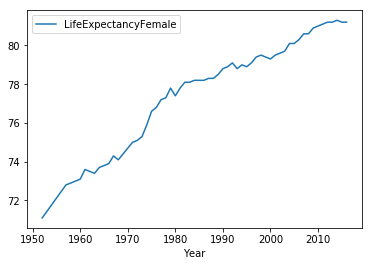

In [17]:
###life expectancy female of usa####
x = lifeexpectancyfemale[lifeexpectancyfemale['NOC'] == 'USA']
del x['NOC']
x = x.drop_duplicates()
x = x.reset_index()
del x['index']
x.LifeExpectancyFemale = pd.to_numeric(x['LifeExpectancyFemale'])
x.Year = pd.to_numeric(x['Year'])
x.plot(x = 'Year', y = 'LifeExpectancyFemale')

In [18]:
averageLEF = x.LifeExpectancyFemale.mean()
averageLEF

77.7

Text(0.5,1,'Women participation per edition of the Games')

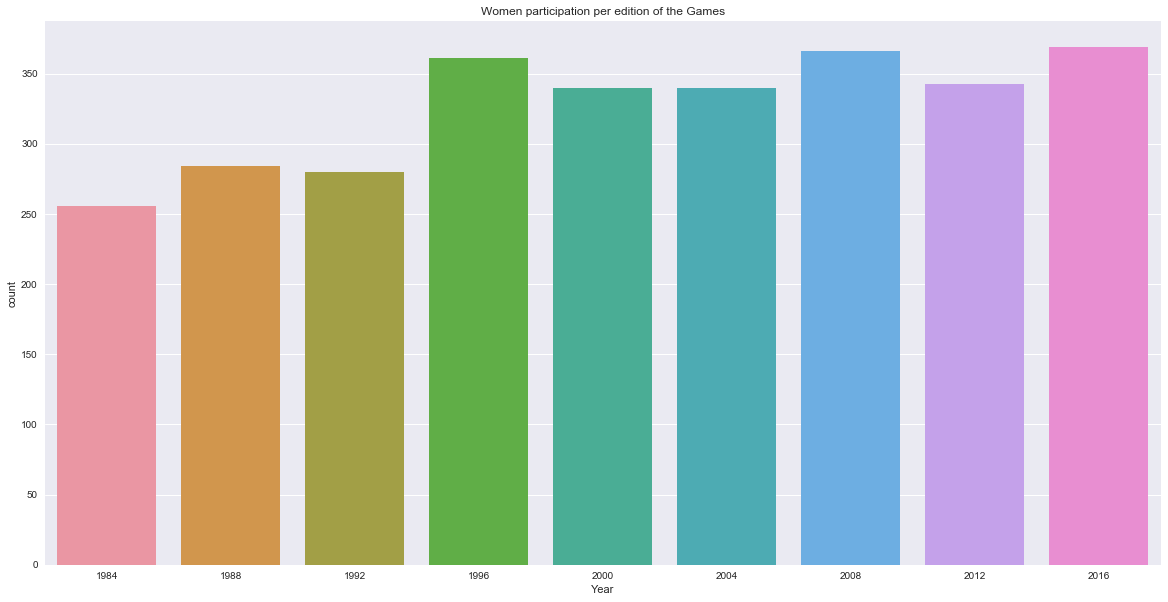

In [19]:
####participation when life expectancy was above average###
womenInOlympics_Participation = df3[(df3.Sex == 'F') & (df3.Season == 'Summer') & (df3.LifeExpectancyFemale  > averageLEF)]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics_Participation)
plt.title('Women participation per edition of the Games')

In [20]:
len(womenInOlympics_Participation)

2939

Text(0.5,1,'Women gold medals per edition of the Games')

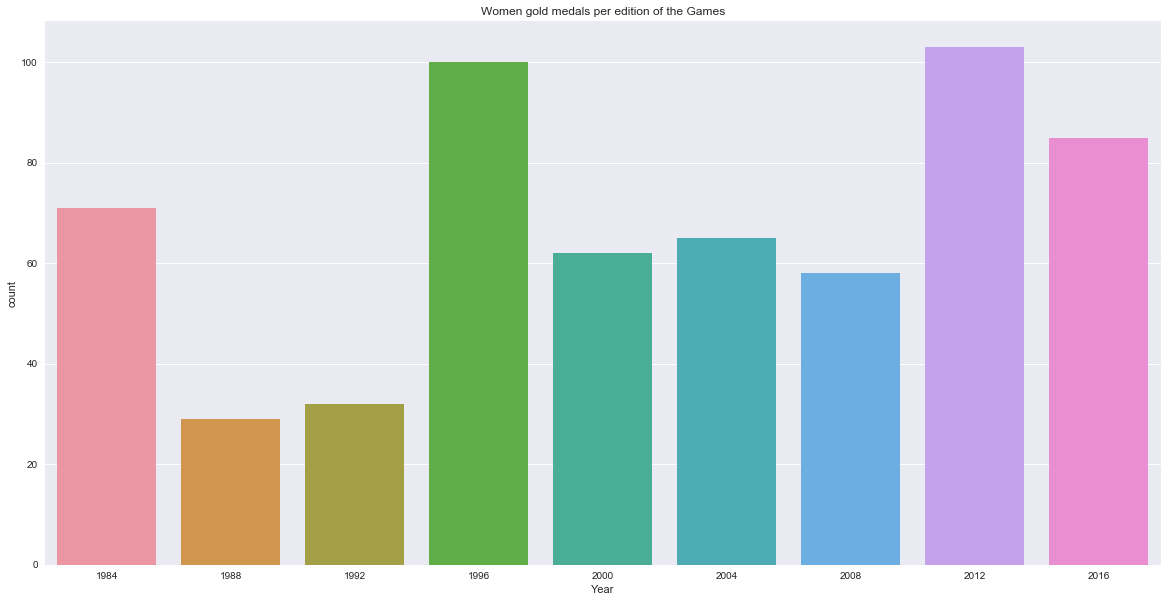

In [21]:
####gold medals when life expectancy was above average###
womenInOlympics_Gold = df3[(df3.Sex == 'F') & (df3.Season == 'Summer') & (df3.Medal == 'Gold') & (df3.LifeExpectancyFemale  > averageLEF)]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics_Gold)
plt.title('Women gold medals per edition of the Games')

In [22]:
len(womenInOlympics_Gold )

605

In [23]:
(len(womenInOlympics_Gold )/len(womenInOlympics_Participation))*100

20.58523307247363

Text(0.5,1,'Women participation per edition of the Games')

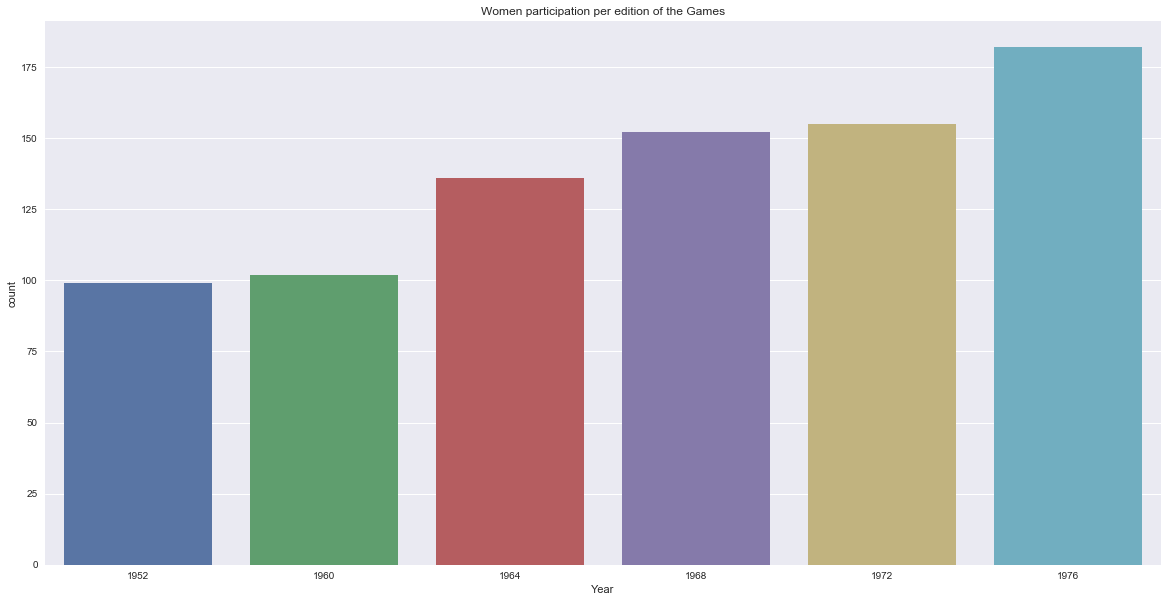

In [24]:
####participation when life expectancy was below average###
womenInOlympics1_Participation = df3[(df3.Sex == 'F') & (df3.Season == 'Summer') & (df3.LifeExpectancyFemale  < averageLEF)]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics1_Participation)
plt.title('Women participation per edition of the Games')

In [25]:
len(womenInOlympics1_Participation)

826

Text(0.5,1,'Women gold medals per edition of the Games')

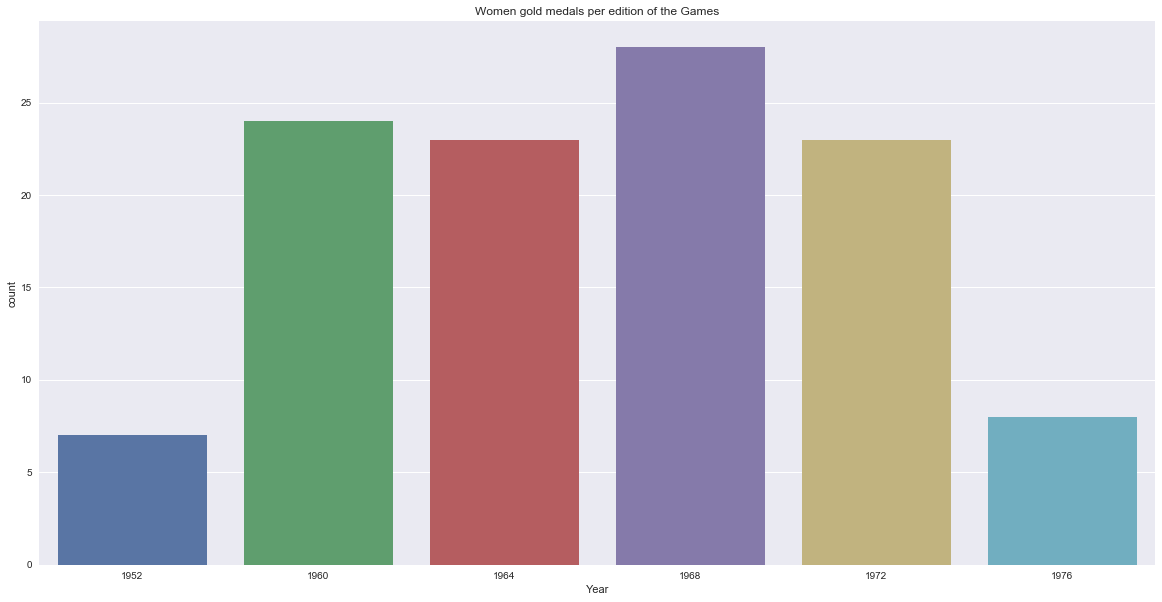

In [26]:
####gold medals when life expectancy was below average###
womenInOlympics1_Gold = df3[(df3.Sex == 'F') & (df3.Season == 'Summer') & (df3.Medal == 'Gold') & (df3.LifeExpectancyFemale  < averageLEF)]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics1_Gold)
plt.title('Women gold medals per edition of the Games')

In [27]:
len(womenInOlympics1_Gold)

113

In [28]:
(len(womenInOlympics1_Gold )/len(womenInOlympics1_Participation))*100

13.68038740920097

In [29]:
'''The increase in gold medals is by 7% from below average female life expectancy years to 
above average female life expectancy years in USA.
'''

'The increase in gold medals is by 7% from below average female life expectancy years to \nabove average female life expectancy years in USA.\n'

In [30]:
###Insight two is the cold war period comparison between USA and URS###
####filtering only the medal data with no NAN####
medals = df2.dropna(subset=['Medal'])
medal_counts = medals['NOC'].value_counts()
print('The total medals: %d' % medal_counts.sum())
print('\nTop 10 countries:\n', medal_counts.head(10))

The total medals: 30476

Top 10 countries:
 USA    3971
URS    2503
GER    1598
AUS    1260
RUS    1148
ITA    1115
CAN    1034
GDR    1005
CHN     989
GBR     956
Name: NOC, dtype: int64


In [31]:
counted = medals.pivot_table(index='NOC', values='Name', columns='Medal', aggfunc='count')
counted['totals'] = counted.sum(axis='columns')
counted = counted.sort_values('totals', ascending=False)
counted.head(10)
##USA and URS are the top two performers###

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,915.0,1878.0,1178.0,3971.0
URS,689.0,1082.0,732.0,2503.0
GER,563.0,545.0,490.0,1598.0
AUS,498.0,333.0,429.0,1260.0
RUS,399.0,389.0,360.0,1148.0
ITA,410.0,331.0,374.0,1115.0
CAN,335.0,349.0,350.0,1034.0
GDR,281.0,397.0,327.0,1005.0
CHN,292.0,350.0,347.0,989.0


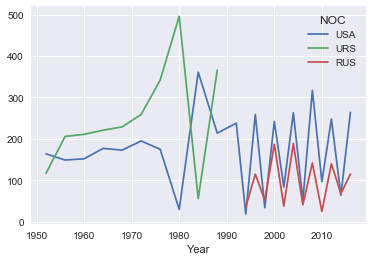

In [34]:
y = medals.pivot_table(index = 'Year', values='Name', columns='NOC', aggfunc='count')
y[['USA','URS','RUS']].plot()
##plot of total medals earned each olympics by USA, URS and RUS

In [35]:
g = gdppercapita.reset_index()
del g['index']

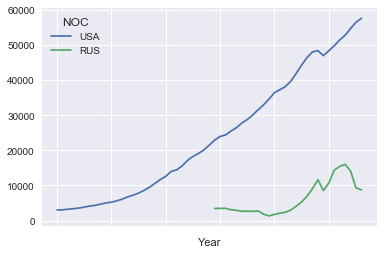

In [36]:
### looking into the GDP of USA and RUS
g1= g.pivot_table(index = 'Year', values='GdpPerCapita', columns='NOC', aggfunc='sum')
g1.USA = pd.to_numeric(g1['USA'])
g1.RUS = pd.to_numeric(g1['RUS'])
g1[['USA','RUS']].plot()

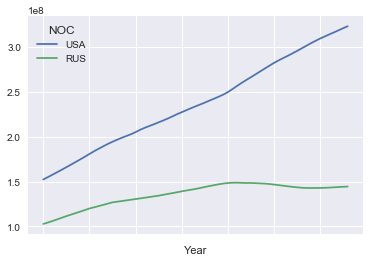

In [37]:
p = populationtotal.reset_index()
del p['index']
p1= p.pivot_table(index = 'Year', values='PopulationTotal', columns='NOC', aggfunc='sum')
p1.USA = pd.to_numeric(p1['USA'])
p1.RUS = pd.to_numeric(p1['RUS'])
p1[['USA','RUS']].plot()

###graph1- soviet union was better than USA in summer games, the one winter games they participated in, they were beaten flat by USA
###graph1 - when the sovient union broke off, russia was been out-performed by USA during all games
###graph2 - USA sees stron g GDP growth, where as russia is seeing GDP growth (since 2000?)
###graph3 - USA has seen exponential population growth, where as russia (and Soviet) sees comparatively constant growth. As russia, the population grew a little. 

###conclusion - GDP grew and population remained fairly constant, but medal tally fell, so we can conclude that the soviet invested more on their athletes' training. Since the cold war ended, Russia has not prioritized the olympics as much as the USA has

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


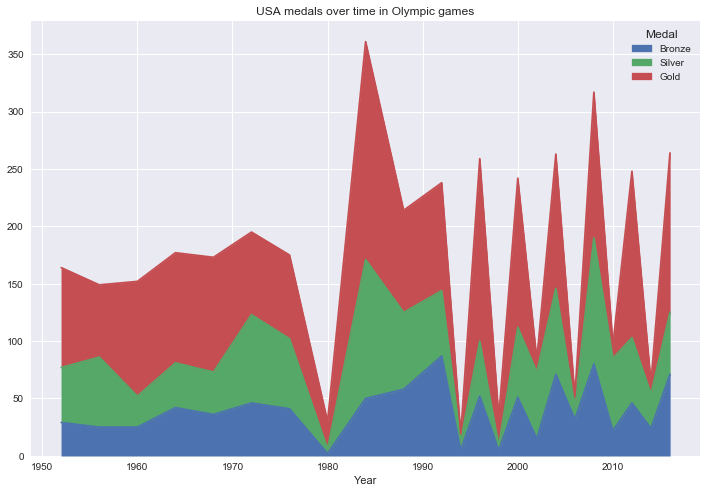

In [38]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Year', 'Medal'])['Name'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot.area(figsize=(12,8), title='USA medals over time in Olympic games')
plt.show()

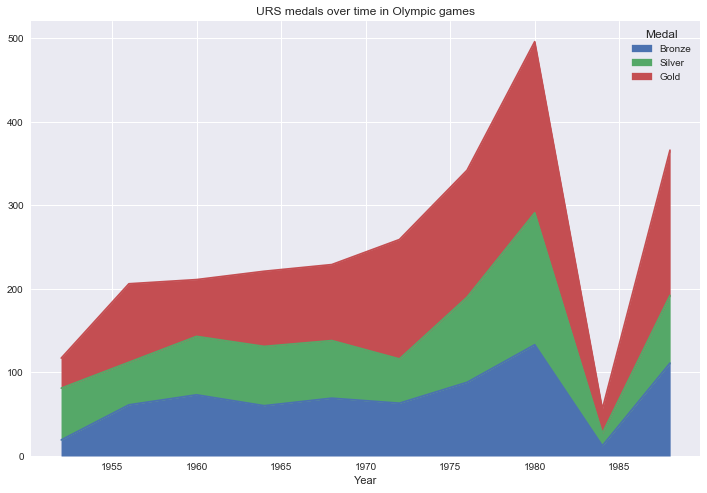

In [39]:
urs = medals[medals.NOC == 'URS']
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
urs_medals_by_year = urs.groupby(['Year', 'Medal'])['Name'].count()
urs_medals_by_year = urs_medals_by_year.unstack(level='Medal')
# Plot the DataFrame usa_medals_by_year
urs_medals_by_year.plot.area(figsize=(12,8), title='URS medals over time in Olympic games')
plt.show()

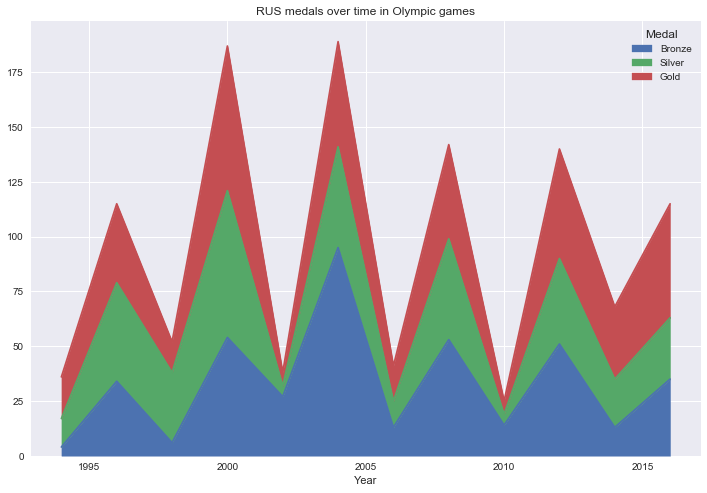

In [40]:
rus = medals[medals.NOC == 'RUS']
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
rus_medals_by_year = rus.groupby(['Year', 'Medal'])['Name'].count()
rus_medals_by_year = rus_medals_by_year.unstack(level='Medal')
# Plot the DataFrame usa_medals_by_year
rus_medals_by_year.plot.area(figsize=(12,8), title='RUS medals over time in Olympic games')
plt.show()

In [41]:
### brick countries performance between 1990 and 2000
bric0 = df2[(df2.Year < 2000) & (df2.Year >= 1990)]
bric0['Medal'].fillna('Participation Only', inplace=True)
ind_medals = bric0[(bric0.NOC == 'BRA') | (bric0.NOC == 'RUS') | (bric0.NOC == 'IND') | (bric0.NOC == 'CHN')].pivot_table(index=['NOC'], columns='Medal', values='Name', aggfunc='count', dropna=True, fill_value=0, margins=True)
ind_medals_sort = ind_medals.sort_values('All', ascending=False)
print('Top bric sports according to Olympic medals from 1990 to 1999:')
ind_medals_sort.head(16)


### ALL in the dataframe is includes medalists AND participants.

Top bric sports according to Olympic medals from 1990 to 1999:


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Medal,Bronze,Gold,Participation Only,Silver,All
NOC,,,,,
All,131,124,2127,234,2616
CHN,43,37,829,128,1037
RUS,44,69,754,90,957
BRA,43,18,425,16,502
IND,1,0,119,0,120


In [42]:
### brick countries performance after 2000
bric = df2[df2.Year >= 2000]
bric['Medal'].fillna('Participation Only', inplace=True)
ind_medals = bric[(bric.NOC == 'BRA') | (bric.NOC == 'RUS') | (bric.NOC == 'IND') | (bric.NOC == 'CHN')].pivot_table(index=['NOC'], columns='Medal', values='Name', aggfunc='count', dropna=True, fill_value=0, margins=True)
ind_medals_sort = ind_medals.sort_values('All', ascending=False)
print('Top bric sports according to Olympic medals from 2000 to 2016:')
ind_medals_sort.head(16)

### Russia made the biggest improvement
#generally medlas tally and participation increased as well

Top bric sports according to Olympic medals from 2000 to 2016:


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Medal,Bronze,Gold,Participation Only,Silver,All
NOC,,,,,
All,631,686,7428,571,9316
RUS,355,320,2960,270,3905
CHN,182,283,2475,190,3130
BRA,86,82,1552,107,1827
IND,8,1,441,4,454


In [43]:
### GDP per capita before 2000
bric0['GdpPerCapita'].fillna('0', inplace=True)
bric0.GdpPerCapita = pd.to_numeric(bric0['GdpPerCapita'])
avg_bric0 = bric0.groupby(['NOC'])['GdpPerCapita'].mean().reset_index(name='Average_GdpPerCapita')
avg_bric0[(avg_bric0.NOC == 'BRA') | (avg_bric0.NOC == 'RUS') | (avg_bric0.NOC == 'IND') | (avg_bric0.NOC == 'CHN')].sort_values('Average_GdpPerCapita', ascending=False)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,NOC,Average_GdpPerCapita
27,BRA,3881.051355
154,RUS,2481.591818
39,CHN,554.966220
85,IND,351.621917


In [44]:
###gdp per capita after 2000
bric['GdpPerCapita'].fillna('0', inplace=True)
bric.GdpPerCapita = pd.to_numeric(bric['GdpPerCapita'])
avg_bric = bric.groupby(['NOC'])['GdpPerCapita'].mean().reset_index(name='Average_GdpPerCapita')
avg_bric[(avg_bric.NOC == 'BRA') | (avg_bric.NOC == 'RUS') | (avg_bric.NOC == 'IND') | (avg_bric.NOC == 'CHN')].sort_values('Average_GdpPerCapita', ascending=False)

### russia's gdp also grew in the same time period (i.e after 2000)



/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,NOC,Average_GdpPerCapita
161,RUS,8450.441063
27,BRA,7767.063470
39,CHN,4041.280195
86,IND,1142.724515


In [45]:
### brick countries performance between 1990 and 1999
bric0 = df2[(df2.Year < 2000) & (df2.Year >= 1990)]
bric0['Medal'].fillna('Participation Only', inplace=True)
ind_medals = bric0[(bric0.NOC == 'BRA') | (bric0.NOC == 'RUS') | (bric0.NOC == 'IND') | (bric0.NOC == 'CHN')].pivot_table(index=['NOC','Sport'], columns='Medal', values='Name', aggfunc='count', dropna=True, fill_value=0, margins=True)
ind_medals_sort = ind_medals.sort_values('All', ascending=False)
print('Top bric sports according to Olympic medals from 1990 to 1999:')
ind_medals_sort.head(16)

# china's lead was because of gymnastics

Top bric sports according to Olympic medals from 1990 to 1999:


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Medal                     Bronze  Gold  Participation Only  Silver   All
NOC Sport                                                               
All                          131   124                2127     234  2616
CHN Gymnastics                 3     3                 150      19   175
RUS Athletics                  1     3                  85       6    95
    Gymnastics                 3     9                  71       8    91
CHN Swimming                   5     5                  65      15    90
BRA Athletics                  4     0                  77       0    81
RUS Cross Country Skiing       2    14                  61       3    80
CHN Athletics                  3     2                  66       3    74
RUS Speed Skating              1     2                  55       2    60
    Swimming                   2     4                  39      13    58
CHN Shooting                   1     4                  47       4    56
    Speed Skating              1     0                  49       2    52
BRA Basketball                 0     0                  36      12    48
CHN Rowing                     2     0                  44       2    48
RUS Biathlon                   5     7                  28       8    48
BRA Volleyball                12    12                  23       0    47

In [46]:
### brick countries performance after 2000
bric = df2[df2.Year >= 2000]
bric['Medal'].fillna('Participation Only', inplace=True)
ind_medals = bric[(bric.NOC == 'BRA') | (bric.NOC == 'RUS') | (bric.NOC == 'IND') | (bric.NOC == 'CHN')].pivot_table(index=['NOC','Sport'], columns='Medal', values='Name', aggfunc='count', dropna=True, fill_value=0, margins=True)
ind_medals_sort = ind_medals.sort_values('All', ascending=False)
print('Top bric sports according to Olympic medals from 2000 to 2016:')
ind_medals_sort.head(16)

# russia rose to the challenge by improving on their athletics

##also, russia's gdp per capita grew more than china at the same time. probably more investment than china in olympics.

Top bric sports according to Olympic medals from 2000 to 2016:


/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Medal                     Bronze  Gold  Participation Only  Silver   All
NOC Sport                                                               
All                          631   686                7428     571  9316
RUS Athletics                 28    26                 376      39   469
CHN Swimming                  17     8                 284      16   325
RUS Swimming                  12     1                 293      11   317
    Gymnastics                26     7                 250      30   313
CHN Gymnastics                19    36                 237       6   298
    Athletics                  9     6                 248       2   265
BRA Athletics                  5     2                 215       5   227
    Swimming                   7     1                 201       1   210
RUS Cross Country Skiing      10     9                 145      11   175
    Ice Hockey                21     0                 149       0   170
BRA Football                  17    17                  67      53   154
    Gymnastics                 1     1                 149       2   153
RUS Biathlon                  12    15                 112      10   149
    Speed Skating             11     1                 127       3   142
    Fencing                   16    25                  94       6   141